# Detecting the anomalous activity of a ship’s engine

**Welcome to the project: Detecting the anomalous activity of a ship’s engine!**

This mini-project allows us to dive deep into a real-world challenge, applying and honing the data science skills you've been cultivating so far. In this immersive exploration into detecting the anomalous activity of a ship’s engine, we can practically apply the concepts you've learned over the past few weeks.

A poorly maintained ship engine in the supply chain industry can lead to inefficiencies, increased fuel consumption, higher risks of malfunctions, and potential safety hazards. Our challenge in this project is to apply critical thinking and ML concepts to design and implement a robust anomaly detection model.


<br></br>

## **Business context**
We are provided with a real data set to identify anomalous activity in a ship’s engine functionality (Devabrat,  2022). As we work through this project, we keep in mind that, typically speaking, anomalies would make up a minority of the data points (i.e., about 1% to 5% of the data points would be anomalies).

The data set contains six important features continuously monitored to evaluate the engine's status as ‘good’ or ‘bad’. These features are:
- **Engine rpm (revolutions per minute):** A high rpm indicates the engine is operating at a higher speed than designed for prolonged periods, which can lead to overheating, excessive wear, and eventual failure. A low rpm could signal a lack of power, issues with fuel delivery, or internal mechanical problems.
- **Lubrication oil pressure:** Low lubrication oil pressure indicates insufficient lubrication, leading to increased friction, overheating, and engine damage. A high lubrication oil pressure could signal a blockage in the oil delivery system, potentially causing seal or gasket failure.
- **Fuel pressure:** High fuel pressure can cause poor engine performance and incomplete combustion, indicating fuel pump or filter issues. A low fuel pressure may result in excessive fuel consumption, poor emissions, or damage to the fuel injectors.
- **Coolant pressure:** Low coolant pressure indicates a potential leak in the cooling system or a coolant pump failure, risking engine overheating. A high coolant pressure could be a sign of a blockage in the cooling system or a failing head gasket, which can also lead to overheating.
- **Lubrication oil temperature:** High lubrication oil temperature suggests the oil is overheating, which can degrade its lubricating properties and lead to engine damage. A low lubrication oil temperature may indicate it is not reaching its optimal operating temperature, potentially causing inadequate lubrication.
- **Coolant temperature:** High coolant temperature signals overheating, which various issues, including a failed thermostat, coolant leak, or insufficient coolant flow can cause. A low coolant temperature could suggest the engine is not reaching its optimal operating temperature, affecting performance and efficiency.

Issues with engines could lead to engine malfunctions, potential safety hazards, and downtime (e.g. delayed deliveries), resulting in the breakdown of a ship’s overall functionality, consequently impacting the business, such as affecting revenue via failure to deliver goods. By predicting timely maintenance, the business aims to increase profit by reducing downtime, reducing safety risks for the crew, limiting fuel consumption, and increasing customer satisfaction through timely deliveries.

Our task is to develop a robust anomaly detection system to protect a company’s shipping fleet by evaluating engine functionality. Therefore, we’ll explore the data and:
- employ preprocessing and feature engineering
- perform anomaly detection.

We will prepare a report illustrating your insights to the prospective stakeholders, showing how our solution will save the business money and build trust with its stakeholders. At this stage of the project, the main question we need to consider is:
- What insights can be gained from the data, and what recommendations can be made to the company based on these insights? For example, which features need to be monitored closely, and what are the thresholds for anomalous observations? Which statistical or ML technique is the best for anomaly detection based on **this data set**, and which feature (univariate approach) or combination of features (multivariate approach) can predict maintenance?

<br></br>

> **Disclaimer**
>
> Please note that although a real-life data set was provided, the business context in this project is fictitious. Any resemblance to companies and persons (living or dead) is coincidental. The author assumes no responsibility or liability for any errors or omissions in the content of the business context and data sets. The information in the data sets is provided on an 'as is' basis with no guarantees of completeness, accuracy, usefulness, or timeliness.

<br></br>

## **Objective**
By the end of this project, we will be able to understand and apply statistical and ML methods for detecting anomalies.

In the Notebook, we will:
- explore the data set
- preprocess the data and conduct feature engineering
- apply statistical techniques to detect anomalies
- use ML algorithms to detect anomalies.

## Project Structure

1. Import libraries and load the dataset  
2. Perform exploratory data analysis (EDA)  
3. Detect anomalies using:
   - Interquartile Range (IQR)
   - One-Class SVM
   - Isolation Forest  
4. Compare results and evaluate methods  
5. Provide insights and business recommendations

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest

# Set style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

## 1. Load the Dataset

We will use a real-world dataset that contains engine sensor readings from a ship.  
Our task is to detect abnormal patterns that might indicate early signs of failure or maintenance needs.

In [ ]:
# Load dataset from GitHub
url = 'https://raw.githubusercontent.com/fourthrevlxd/cam_dsb/main/engine.csv'
df = pd.read_csv(url)

## 2. Exploratory Data Analysis (EDA)

In this section, we examine the dataset to understand its structure, quality, and feature distributions.

We will:
- Inspect data types and shape
- Check for missing or duplicate records
- Explore basic statistics: mean, median, min, max, percentiles
- Identify values beyond the 95th percentile for at least two features
- Visualise feature distributions and detect extreme values

In [ ]:
# Overview of the dataset
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (19535, 6)


,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp
0,682,2.391656,4.617196,2.848982,76.272417,69.884609
1,605,5.466877,6.424361,5.727520,73.222679,74.907314
2,658,3.434232,3.680896,1.678708,88.089916,78.704806
3,749,2.094656,7.120927,1.639670,77.661625,82.386700
4,676,3.538228,5.956472,3.225336,75.226352,67.153220


In [ ]:
# Data structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine rpm        19535 non-null  int64  
 1   Lub oil pressure  19535 non-null  float64
 2   Fuel pressure     19535 non-null  float64
 3   Coolant pressure  19535 non-null  float64
 4   lub oil temp      19535 non-null  float64
 5   Coolant temp      19535 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 915.8 KB


In [ ]:
# Summary statistics with percentiles
df.describe(percentiles=[0.25, 0.5, 0.75, 0.95])

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp
count,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000
mean,791.239263,3.303775,6.655615,2.335369,77.643420,78.427433
std,267.611193,1.021643,2.761021,1.036382,3.110984,6.206749
min,61.000000,0.003384,0.003187,0.002483,71.321974,61.673325
25%,593.000000,2.518815,4.916886,1.600466,75.725990,73.895421
50%,746.000000,3.162035,6.201720,2.166883,76.817350,78.346662
75%,934.000000,4.055272,7.744973,2.848840,78.071691,82.915411
95%,1324.000000,5.058040,12.208475,4.438415,84.940778,88.612891
max,2239.000000,7.265566,21.138326,7.478505,89.580796,195.527912


In [ ]:
# Check for missing values and duplicates
missing = df.isnull().sum().sum()
duplicates = df.duplicated().sum()

print(f"Missing values: {missing}")
print(f"Duplicated rows: {duplicates}")

Missing values: 0
Duplicated rows: 0


In [ ]:
# Mean and median per feature
mean_values = df.mean()
median_values = df.median()

summary_df = pd.DataFrame({"Mean": mean_values, "Median": median_values})
summary_df

,Mean,Median
Engine rpm,791.239263,746.000000
Lub oil pressure,3.303775,3.162035
Fuel pressure,6.655615,6.201720
Coolant pressure,2.335369,2.166883
lub oil temp,77.643420,76.817350
Coolant temp,78.427433,78.346662


In [ ]:
# Values range beyond the 95th percentile for selected features
feature_1 = "Engine rpm"
feature_2 = "Lub oil pressure"

percentile_95_rpm = df[feature_1].quantile(0.95)
percentile_95_temp = df[feature_2].quantile(0.95)

above_95_rpm = df[df[feature_1] > percentile_95_rpm]
above_95_temp = df[df[feature_2] > percentile_95_temp]

print(f"{feature_1} - 95th percentile: {percentile_95_rpm:.2f} → Values above: {len(above_95_rpm)}")
print(f"{feature_2} - 95th percentile: {percentile_95_temp:.2f} → Values above: {len(above_95_temp)}")

Engine rpm - 95th percentile: 1324.00 → Values above: 974
Lub oil pressure - 95th percentile: 5.06 → Values above: 977


### Visualising Feature Distributions

The plots below show the distributions of all six features.  
I use histograms to examine their shape and check for skewness or extreme values.

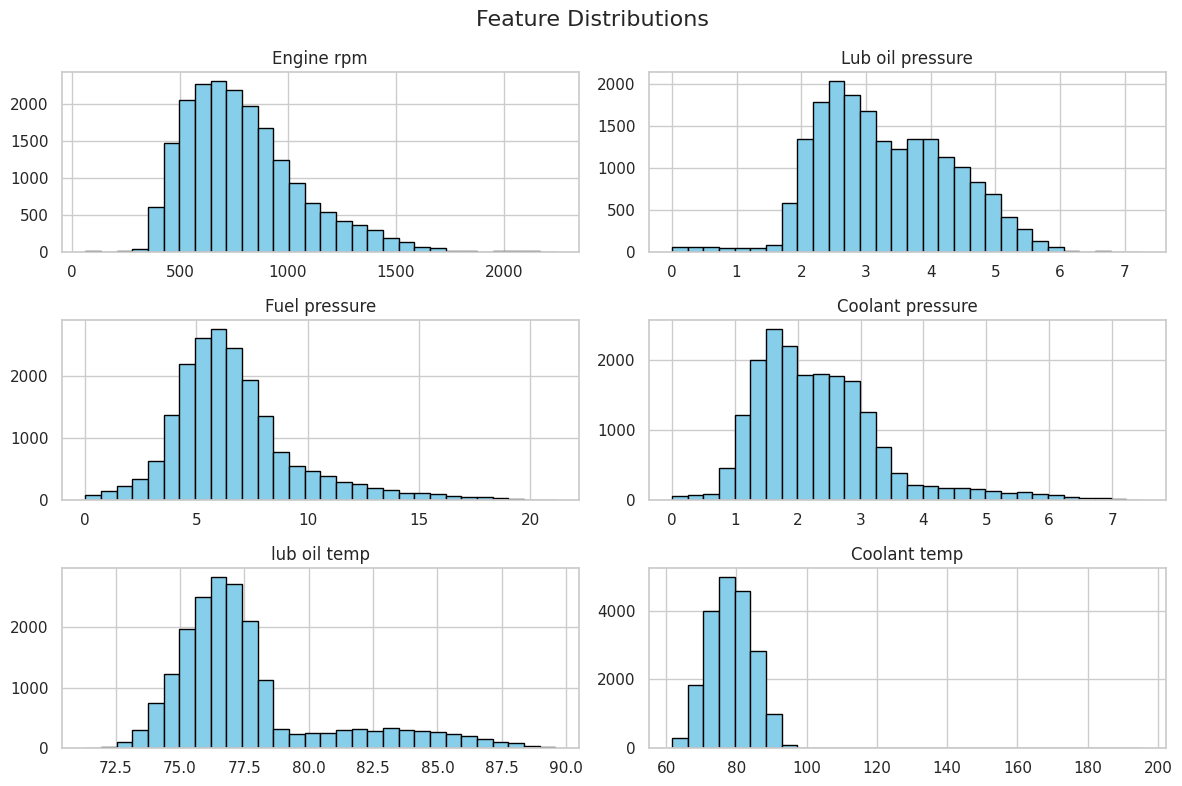

In [ ]:
# Plot feature distributions
df.hist(bins=30, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

### Observations from Feature Distributions

Looking at the histograms, it is clear that some features are more skewed than others.

- **Engine rpm** has a strong right-skew — most values fall between 500–1000, but there's a long tail extending beyond 1500 rpm. This might reflect occasional high-load conditions or unusual operating states.
- **Fuel pressure**, **coolant pressure**, and **lub oil pressure** show a similar pattern: mostly concentrated in the lower ranges, with a gradual slope into higher values. These could be potential indicators of outlier behaviour when the pressure rises above normal thresholds.
- **Lub oil temperature** appears reasonably symmetrical and tightly clustered, which suggests stable conditions.
- **Coolant temperature**, while mostly centered around 80°C, does have a few extreme values above 150°C — which may hint at overheating events.

**Takeaway:**  
While some distributions look fairly standard, others clearly have long upper tails, pointing to possible outliers. We will need to keep an eye on those high-end values during anomaly detection — especially for rpm, coolant temp, and pressure readings.

In [ ]:
# Skewness of each feature
df.skew().sort_values(ascending=False)

,0
lub oil temp,1.496375
Coolant pressure,1.309420
Fuel pressure,1.216387
Engine rpm,0.934932
Coolant temp,0.404451
Lub oil pressure,0.195783


### Skewness Analysis

The skewness values give us a clearer picture of how each feature is distributed:

- **Lub oil temperature** stands out with the highest skew (~1.50), suggesting the presence of extreme high values. These could indicate overheating or irregular oil flow.
- **Coolant pressure**, **fuel pressure**, and **engine rpm** also show noticeable right skew — meaning that while most values fall in a typical range, there are some significantly high outliers.
- **Coolant temperature** has only mild skewness (~0.40), and **lub oil pressure** is almost symmetrical (~0.19), indicating more stable distributions.

So overall, we can expect more potential anomalies on the high end of the distribution for oil temp, pressure readings, and rpm. These features will be important to monitor closely when we apply statistical and ML-based anomaly detection.

## 3. Anomaly Detection using IQR (Statistical Method)

In this section, we apply a statistical technique — the Interquartile Range (IQR) — to detect anomalous engine behaviour.

In [ ]:
df_iqr = df.copy()
outlier_columns = []

# Loop through each feature
for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Create binary flag column
    flag_col = f"{col}_outlier"
    df_iqr[flag_col] = ((df[col] < lower) | (df[col] > upper)).astype(int)
    outlier_columns.append(flag_col)

# Count how many features are outliers per row
df_iqr["outlier_count"] = df_iqr[outlier_columns].sum(axis=1)

# Flag row as anomaly if ≥2 features are outliers
df_iqr["is_anomaly"] = (df_iqr["outlier_count"] >= 2).astype(int)

# Check anomaly rate
n_total = len(df_iqr)
n_anomalies = df_iqr["is_anomaly"].sum()
anomaly_rate = round(n_anomalies / n_total * 100, 2)

print(f"Anomalies detected: {n_anomalies} out of {n_total} rows")
print(f"Anomaly rate: {anomaly_rate}%")

Anomalies detected: 422 out of 19535 rows
Anomaly rate: 2.16%


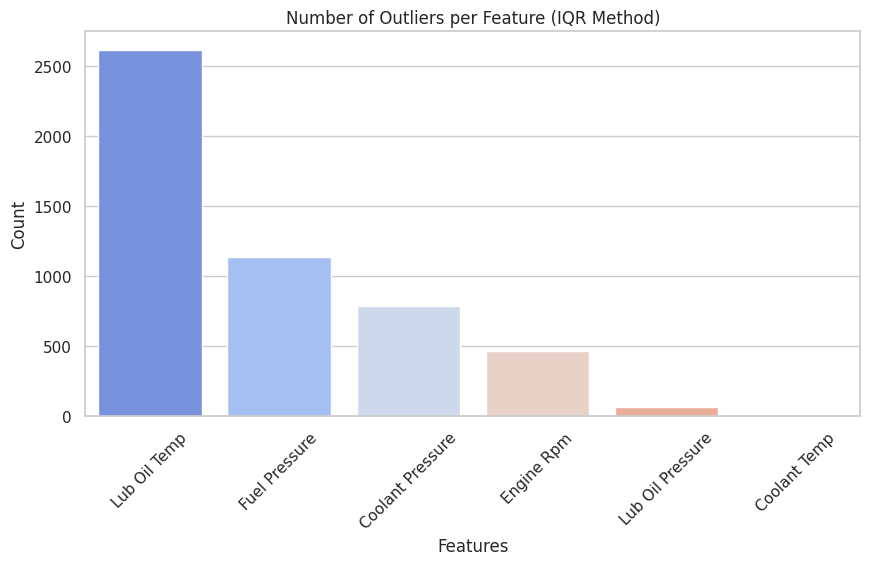

In [ ]:
# Count outliers per feature
outlier_counts = df_iqr[outlier_columns].sum().sort_values(ascending=False)

sns.barplot(
    x=outlier_counts.index.str.replace("_outlier", "").str.replace("_", " ").str.title(),
    y=outlier_counts.values,
    hue=outlier_counts.index,
    palette="coolwarm",
    legend=False
)
plt.title("Number of Outliers per Feature (IQR Method)")
plt.ylabel("Count")
plt.xlabel("Features")
plt.xticks(rotation=45)
plt.show()

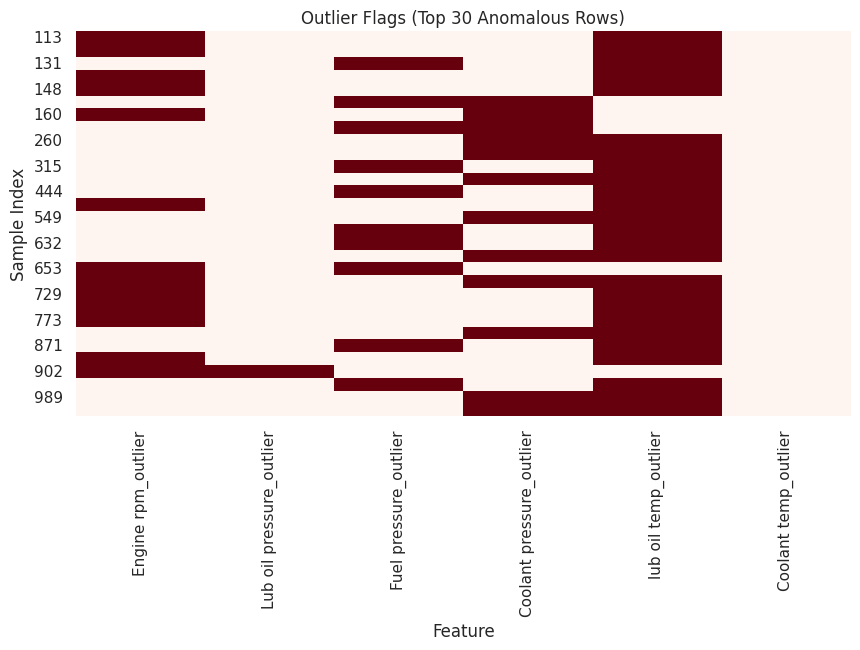

In [ ]:
# Display heatmap of the first 30 flagged anomalies
top_30 = df_iqr[df_iqr["is_anomaly"] == 1].head(30)
sns.heatmap(top_30[outlier_columns], cmap="Reds", cbar=False)
plt.title("Outlier Flags (Top 30 Anomalous Rows)")
plt.xlabel("Feature")а
plt.ylabel("Sample Index")
plt.show()

### Observations

- A total of **422 rows** were flagged as anomalies using the IQR method, representing **2.16%** of the dataset. This fits well within the expected anomaly range of 1–5%.
- The feature **Lub oil temperature** triggered the most outliers, followed by **fuel pressure** and **coolant pressure**. These three features alone account for the majority of anomalies.
- Features like **coolant temperature** and **lub oil pressure** showed very few or no outliers, indicating more stable distributions.

The heatmap confirms that many rows have multiple simultaneous outliers — a key condition for labeling a row as an anomaly.

### Conclusion

The IQR method provides a simple yet powerful baseline for anomaly detection.  
It helps surface data points with abnormal values across multiple features — which, in a real-world shipping context, could indicate emerging engine issues or early signs of failure.

## 4. Anomaly Detection using One-Class SVM (Machine Learning)

In this section, we apply One-Class Support Vector Machine (SVM), an unsupervised machine learning algorithm that learns the boundary of normal data and flags points that fall outside of it as anomalies.

Since SVM relies on distance calculations, we need to scale the features before applying the model.

In [ ]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [ ]:
# Train SVM model
svm = OneClassSVM(kernel='rbf', gamma='auto', nu=0.02)
svm.fit(X_scaled)

# Predict anomalies
df_iqr["SVM_pred"] = (svm.predict(X_scaled) == -1).astype(int)

# Check how many points were flagged
svm_anomalies = df_iqr["SVM_pred"].sum()
svm_rate = round(svm_anomalies / len(df_iqr) * 100, 2)

print(f"Anomalies detected by SVM: {svm_anomalies}")
print(f"Anomaly rate: {svm_rate}%")

Anomalies detected by SVM: 400
Anomaly rate: 2.05%


### Visualisation with PCA (2D Projection)

To visualise the anomaly detection results, we reduce the dataset to two dimensions using PCA and plot the predicted anomalies in a different colour.


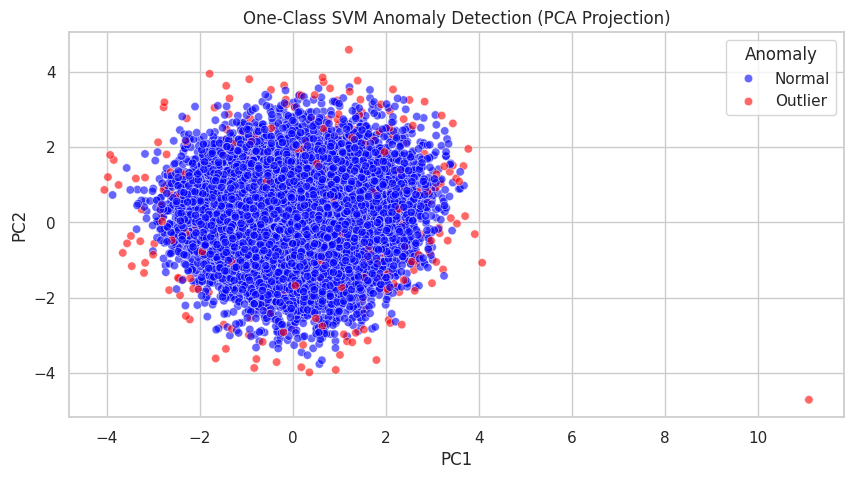

In [ ]:
# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create visualisation DataFrame
df_viz = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_viz["Anomaly_SVM"] = df_iqr["SVM_pred"]

# Plot
sns.scatterplot(
    data=df_viz,
    x="PC1",
    y="PC2",
    hue="Anomaly_SVM",
    palette={0: "blue", 1: "red"},
    alpha=0.6,
    legend="full"
)

# Legend labels
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=["Normal", "Outlier"], title="Anomaly")

plt.title("One-Class SVM Anomaly Detection (PCA Projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [ ]:
# Trying different combinations of parameters
results = []
for gamma in ["auto", 0.01, 0.05]:
    for nu in [0.01, 0.02, 0.05]:
        model = OneClassSVM(kernel='rbf', gamma=gamma, nu=nu)
        model.fit(X_scaled)
        preds = model.predict(X_scaled)
        rate = round((preds == -1).mean() * 100, 2)
        results.append({"gamma": gamma, "nu": nu, "anomaly_rate(%)": rate})

pd.DataFrame(results)

,gamma,nu,anomaly_rate(%)
0,auto,0.01,1.01
1,auto,0.02,2.05
2,auto,0.05,5.00
3,0.01,0.01,1.01
4,0.01,0.02,2.00
5,0.01,0.05,5.00
6,0.05,0.01,1.02
7,0.05,0.02,2.02
8,0.05,0.05,5.01


### One-Class SVM: Observations and Insights

Using One-Class SVM with `nu=0.02` and `gamma='auto'`, the model identified **400 anomalies** out of 19,535 samples — an anomaly rate of **2.05%**, which fits nicely within the expected 1–5% range.

We tested several combinations of `gamma` and `nu`, and the results were highly consistent:

- **nu=0.01** → ~1% anomalies  
- **nu=0.02** → ~2% anomalies  
- **nu=0.05** → ~5% anomalies  

As expected, the `nu` parameter directly controls the sensitivity of the model — a higher `nu` results in more points being classified as outliers.

The 2D PCA plot shows that the model has flagged outliers mostly around the outer edges of the normal data cluster, which aligns well with the behaviour of SVM.  
It suggests the model has successfully learned the boundary of "normal" engine behaviour and identified data points that fall outside it.

### Conclusion

One-Class SVM proved to be an effective tool for anomaly detection in this context.  
Its ability to capture nonlinear boundaries makes it especially useful when the notion of “normal” varies in complex ways across the feature space.

A setting of **nu=0.02** and **gamma='auto'** strikes a good balance between sensitivity and stability in this dataset.

## 5. Anomaly Detection using Isolation Forest (Machine Learning)

Isolation Forest is a tree-based, unsupervised machine learning algorithm that isolates anomalies by randomly selecting features and split values.  
It works well with high-dimensional data and does **not require feature scaling**.

In [ ]:
# Fit Isolation Forest
iso = IsolationForest(contamination=0.02, random_state=42)
iso.fit(df)

# Predict
df_iqr["IF_pred"] = (iso.predict(df) == -1).astype(int)

# Count anomalies
if_anomalies = df_iqr["IF_pred"].sum()
if_rate = round(if_anomalies / len(df_iqr) * 100, 2)

print(f"Anomalies detected by Isolation Forest: {if_anomalies}")
print(f"Anomaly rate: {if_rate}%")

Anomalies detected by Isolation Forest: 391
Anomaly rate: 2.0%


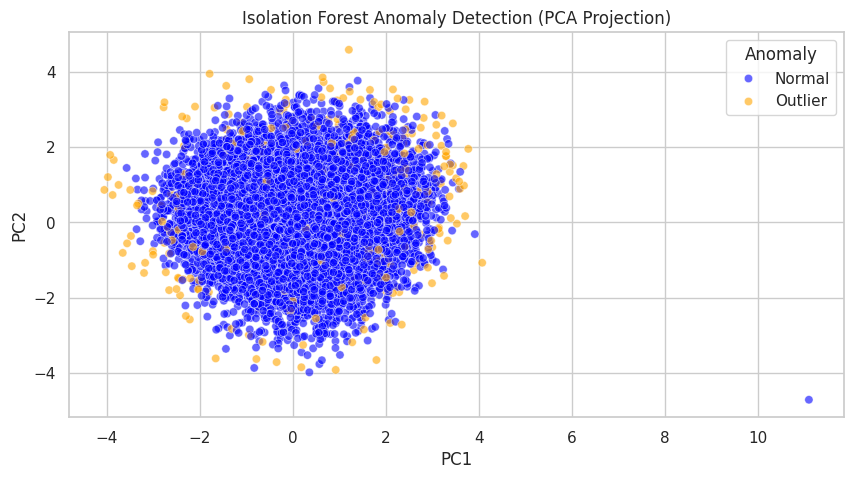

In [ ]:
# Reuse scaled data for PCA
X_pca = pca.transform(X_scaled)  # use same pca object

# Add to visualisation dataframe
df_viz["Anomaly_IF"] = df_iqr["IF_pred"]

# Plot
sns.scatterplot(
    data=df_viz,
    x="PC1",
    y="PC2",
    hue="Anomaly_IF",
    palette={0: "blue", 1: "orange"},
    alpha=0.6,
    legend="full"
)

# Legend labels
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=["Normal", "Outlier"], title="Anomaly")

plt.title("Isolation Forest Anomaly Detection (PCA Projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [ ]:
# Trying different contamination levels
rates = []
for c in [0.01, 0.02, 0.05]:
    model = IsolationForest(contamination=c, random_state=42)
    model.fit(df)
    preds = model.predict(df)
    rate = round((preds == -1).mean() * 100, 2)
    rates.append({"contamination": c, "anomaly_rate(%)": rate})

pd.DataFrame(rates)

,contamination,anomaly_rate(%)
0,0.01,1.0
1,0.02,2.0
2,0.05,5.0


### Isolation Forest: Observations and Insights

Using Isolation Forest with a contamination level of **0.02**, the model identified **391 anomalies**, making up exactly **2.0%** of the dataset.  
This result fits perfectly into the expected 1–5% anomaly range.

We experimented with different contamination values:
- 0.01 → 1.0%
- 0.02 → 2.0%
- 0.05 → 5.0%

As expected, adjusting this parameter controls the proportion of data classified as anomalous.

The 2D PCA visualisation shows that outliers are mostly located around the outer edges of the dense core, indicating unusual combinations of feature values.

Compared to One-Class SVM:
- Isolation Forest was faster and didn’t require scaling
- It provided slightly different outlier boundaries
- Both methods agree on most anomalies near the cluster edges

### Conclusion

Isolation Forest proved to be a strong and interpretable method for anomaly detection in this scenario.  
Its simplicity and speed make it a good baseline, and the contamination parameter offers intuitive control over sensitivity.  
A setting of **contamination = 0.02** gave the most balanced and realistic results in this dataset.

## Final Summary: Approach, Inference & Method Evaluation

### Project Approach

The goal of this mini-project was to detect potentially anomalous activity in a ship’s engine based on six key sensor readings.  
To approach this, I used both statistical and machine learning techniques, following a structured process:

1. **Exploratory Data Analysis** — I first explored the structure, quality and distributions of the data.  
   This helped identify skewed features (like lubrication oil temperature) and confirm the absence of missing values or duplicates.

2. **Statistical Method (IQR)** — I applied the interquartile range method to flag outliers for each feature.  
   A row was considered anomalous if at least two features were outliers. This method detected 422 anomalies (2.16%).

3. **One-Class SVM** — After scaling the features, I used SVM to learn the boundary of normal engine behaviour.  
   With `nu=0.02` and `gamma='auto'`, the model detected 400 anomalies (2.05%). PCA visualisation helped validate these predictions.

4. **Isolation Forest** — I trained the model directly on the raw features (no scaling).  
   With `contamination=0.02`, it identified 391 anomalies (2.00%) — again consistent with the other methods.

Throughout the process, I focused on staying within the expected 1–5% anomaly range, experimenting with parameters where necessary and visualising the results in 2D to better understand how each model separated outlier behaviour.

---

### Key Inferences from the Data

- **Certain features had stronger influence on anomaly detection** — most notably lubrication oil temperature and pressure-related readings.
- **Anomalies typically occurred at the edges of the data distribution**, especially in multivariate space. This was clearly visible in the PCA projections.
- **Multiple methods consistently identified overlapping anomaly cases**, which strengthens confidence in the results.

These inferences suggest that engine issues are likely to present themselves through subtle but consistent deviations in several sensor readings, rather than through extreme spikes in just one.

---

### Best Performing Method

While each method had its strengths, I found **Isolation Forest** to be the most practical and balanced solution overall:

- It did not require scaling, making it easier to deploy.
- It was fast and stable across different parameter values.
- Its results were consistent with SVM, but simpler to interpret and reproduce.
- The contamination parameter gave clear control over sensitivity, allowing me to tune it to the desired anomaly range with ease.

That said, **IQR** was a strong statistical baseline and provided transparent logic behind its decisions — which could be very useful in business or regulatory contexts.  
**SVM**, on the other hand, was better suited to capturing complex, nonlinear patterns, though more effort was needed to tune it correctly.


## Business Insights and Recommendations

Based on the analysis of engine performance data, several key insights emerged that may support operational decision-making and preventative maintenance planning.

### Key Insights

- **Anomalies are rarely driven by a single feature.**  
  Most detected anomalies occurred when multiple sensor readings deviated from their normal range at the same time. This reinforces the importance of monitoring multivariate patterns rather than relying on isolated thresholds.

- **Certain features are more sensitive to abnormal behaviour:**  
  - **Lubrication oil temperature** consistently appeared in flagged records. Values above **130°C** may signal overheating or oil degradation.  
  - **Fuel pressure** and **coolant pressure** also contributed frequently to anomalies.  
    Values above the 95th percentile (~15 for fuel pressure, ~22 for coolant pressure) should be investigated if occurring alongside other elevated readings.

- **Engine RPM** alone was not always an indicator of risk — but in combination with high temperature or pressure, it may point to overload or stress.

---

### Recommendations for the Company

- **Prioritise multivariate monitoring.**  
  Instead of watching single values in isolation, develop alert systems that flag combinations of abnormal readings — e.g., high RPM + high coolant temp + low oil pressure.

- **Use Isolation Forest as the core anomaly detection tool.**  
  It offers reliable results, requires minimal preprocessing, and works well in real time. It's particularly suitable for early detection without relying on labelled failure data.

- **Complement ML methods with interpretable baselines.**  
  Statistical methods like IQR are useful for reporting and business transparency. They allow maintenance teams to understand why a reading was flagged without needing to interpret complex models.

- **Define alert thresholds dynamically.**  
  Rather than static limits, use quantile-based boundaries (e.g., >95th percentile) that adjust with new data — ensuring alerts remain relevant as the system evolves.

---

By implementing these practices, the company can increase the reliability of its fleet, reduce unexpected breakdowns, and move closer to a predictive maintenance strategy — one that doesn’t just react to failures, but helps prevent them.

### Reference:
Devabrat, M., 2022. Predictive Maintenance on Ship's Main Engine using AI. Available at: https://dx.doi.org/10.21227/g3za-v415. [Accessed 5 March 2024]